In [1]:
from __future__ import division, print_function
import numpy as np
import math
from utils import train_test_split, normalize
from utils import Plot, accuracy_score

class NaiveBayes():
    """The Gaussian Naive Bayes classifier. """
    def fit(self, X, y):
        self.X, self.y = X, y
        self.classes = np.unique(y)
        self.parameters = []
        # Calculate the mean and variance of each feature for each class
        for i, c in enumerate(self.classes):
            # Only select the rows where the label equals the given class
            X_where_c = X[np.where(y == c)]
            self.parameters.append([])
            # Add the mean and variance for each feature (column)
            for col in X_where_c.T:
                parameters = {"mean": col.mean(), "var": col.var()}
                self.parameters[i].append(parameters)

    def _calculate_likelihood(self, mean, var, x):
        """ Gaussian likelihood of the data x given mean and var """
        eps = 1e-4 # Added in denominator to prevent division by zero
        coeff = 1.0 / math.sqrt(2.0 * math.pi * var + eps)
        exponent = math.exp(-(math.pow(x - mean, 2) / (2 * var + eps)))
        return coeff * exponent

    def _calculate_prior(self, c):
        """ Calculate the prior of class c
        (samples where class == c / total number of samples)"""
        frequency = np.mean(self.y == c)
        return frequency

    def _classify(self, sample):
        """ Classification using Bayes Rule P(Y|X) = P(X|Y)*P(Y)/P(X),
            or Posterior = Likelihood * Prior / Scaling Factor

        P(Y|X) - The posterior is the probability that sample x is of class y given the
                 feature values of x being distributed according to distribution of y and the prior.
        P(X|Y) - Likelihood of data X given class distribution Y.
                 Gaussian distribution (given by _calculate_likelihood)
        P(Y)   - Prior (given by _calculate_prior)
        P(X)   - Scales the posterior to make it a proper probability distribution.
                 This term is ignored in this implementation since it doesn't affect
                 which class distribution the sample is most likely to belong to.

        Classifies the sample as the class that results in the largest P(Y|X) (posterior)
        """
        posteriors = []
        # Go through list of classes
        for i, c in enumerate(self.classes):
            # Initialize posterior as prior
            posterior = self._calculate_prior(c)
            # Naive assumption (independence):
            # P(x1,x2,x3|Y) = P(x1|Y)*P(x2|Y)*P(x3|Y)
            # Posterior is product of prior and likelihoods (ignoring scaling factor)
            for feature_value, params in zip(sample, self.parameters[i]):
                # Likelihood of feature value given distribution of feature values given y
                likelihood = self._calculate_likelihood(params["mean"], params["var"], feature_value)
                posterior *= likelihood
            posteriors.append(posterior)
        # Return the class with the largest posterior probability
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        """ Predict the class labels of the samples in X """
        y_pred = [self._classify(sample) for sample in X]
        return y_pred


Accuracy: 0.9066852367688022


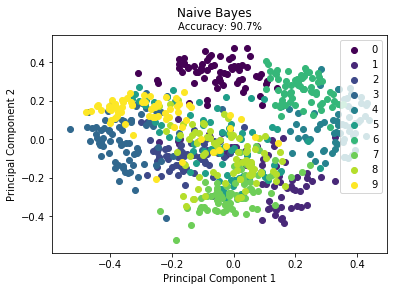

In [2]:
from __future__ import division, print_function
from sklearn import datasets
import numpy as np
from utils import train_test_split, normalize, accuracy_score, Plot


def main():
    data = datasets.load_digits()
    X = normalize(data.data)
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    clf = NaiveBayes()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print ("Accuracy:", accuracy)

    # Reduce dimension to two using PCA and plot the results
    Plot().plot_in_2d(X_test, y_pred, title="Naive Bayes", accuracy=accuracy, legend_labels=data.target_names)

if __name__ == "__main__":
    main()